# Auswertung der Online-Befragung "Herausforderungen der Regelungstechnik"
Bachelorarbeitsthema: Learning Control Systems Engineering with Interactive Visualization <br>
Student: Tim Schwarzbrunn <br>
Kontakt: tim.schwarzbrunn@dlr.de

In [1]:
# Import needed libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the result-xlsx-file as pandas dataframe.
filename = './responses_up_to_133.xlsx'
df = pd.read_excel(filename)
# Remove some unnecessary columns.
df.drop(['Email', 'Name', 'Total points', 'Quiz feedback'], axis=1, inplace=True)
df.drop(df.columns[df.columns.str.contains('Points')], axis=1, inplace=True)
df.drop(df.columns[df.columns.str.contains('Feedback')], axis=1, inplace=True)
# Calculate the needed completion time in seconds.
df['needed_time'] = (df['Completion time'] - df['Start time']).apply(lambda x: x.seconds)
# Print some general informations about the survey.
print('Number of participants:\t' + str(df.shape[0]))
df

Number of participants:	133


,ID,Start time,Completion time,Wie weit bist du mit dem Modul Regelungstechnik bereits fortgeschritten?,Mit welcher Benotung hast du Regelungstechnik abgeschlossen?,Systemtheorie,Übertragungsfunktion,Steuern,Regeln,Regelstrecke,...,z-Transformation,Bilineare z-Transformation (q-Transformation),"Reglerentwurf Digital (Dead-Beat-Verfahren, ...)","Stabilität Digitale Regelung (Pollage, Hurwitz, Nyquist)","Hast du sonstige Anmerkungen zu Themen, welche du besonders leicht oder besonders schwer verständlich fandest?",Welche Hilfsmittel hast du neben dem Skript zum Erlernen von Regelungstechnik verwendet?,"Hast du weitere, oben nicht aufgelistete Hilfsmittel verwendet?","Was denkst du, hat dir von deinen verwendeten Hilfsmitteln am meisten geholfen?","Was denkst du, hätte dich darüber hinaus beim Lernen und Verstehen von Regelungstechnik unterstützt?",needed_time
0,2,2021-04-21 15:48:16,2021-04-21 15:54:03,Prüfung vor Längerem geschrieben (> 1 Monat),gut,eher unsicher,sicher,sicher,sicher,sicher,...,keine Angabe,keine Angabe,keine Angabe,eher leicht,NaN,YouTube;Lerngruppen;Übungsaufgaben;Übungsklaus...,NaN,Übungsaufgaben rechnen und im Anschluss mit de...,Regelungstechnik-Labor bzw. praktisches Arbeit...,347
1,3,2021-04-21 16:01:24,2021-04-21 16:03:34,in Prüfungsvorbereitung,NaN,eher unsicher,sehr sicher,sehr sicher,sehr sicher,sehr sicher,...,eher leicht,keine Angabe,keine Angabe,eher schwer,NaN,MATLAB / Simulink;YouTube;Lerngruppen;Übungsau...,NaN,NaN,NaN,130
2,4,2021-04-21 16:01:56,2021-04-21 16:04:12,Prüfung vor Längerem geschrieben (> 1 Monat),ausreichend,eher sicher,sicher,eher sicher,eher sicher,eher sicher,...,eher schwer,eher schwer,keine Angabe,keine Angabe,NaN,YouTube;Lerngruppen;Übungsaufgaben;Übungsklaus...,NaN,"Übungsaufgaben, YouTube",NaN,136
3,5,2021-04-21 16:02:21,2021-04-21 16:06:43,Prüfung vor Längerem geschrieben (> 1 Monat),sehr gut,eher sicher,sicher,sicher,sicher,eher sicher,...,keine Angabe,keine Angabe,keine Angabe,keine Angabe,NaN,YouTube;Lerngruppen;Übungsaufgaben;Übungsklaus...,NaN,Youtube,Mehr Praxisbeispiele,262
4,6,2021-04-21 16:04:09,2021-04-21 16:08:00,Prüfung vor Längerem geschrieben (> 1 Monat),sehr gut,kaum,sehr sicher,sicher,sicher,eher sicher,...,keine Angabe,keine Angabe,keine Angabe,keine Angabe,NaN,Übungsaufgaben;Übungsklausuren;,NaN,Aufgaben,Labor,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,130,2021-05-06 10:12:27,2021-05-06 10:14:31,Prüfung vor Längerem geschrieben (> 1 Monat),gut,kaum,eher sicher,eher unsicher,eher sicher,eher sicher,...,eher schwer,eher schwer,eher schwer,eher schwer,NaN,MATLAB / Simulink;Übungsaufgaben;Übungsklausur...,NaN,NaN,NaN,124
129,131,2021-05-06 17:03:44,2021-05-06 17:11:03,Prüfung vor Längerem geschrieben (> 1 Monat),ausreichend,eher sicher,sicher,eher unsicher,eher sicher,sicher,...,eher schwer,eher schwer,keine Angabe,keine Angabe,NaN,Lerngruppen;Tutorium / Repetitorium;Online-Foren;,NaN,Lerngruppen,Einfache Regelkreise in Matlab eingeben. Leide...,439
130,132,2021-05-11 13:02:41,2021-05-11 13:06:11,in Prüfungsvorbereitung,NaN,eher sicher,eher sicher,sehr sicher,sehr sicher,sicher,...,eher leicht,eher leicht,eher schwer,eher leicht,NaN,MATLAB / Simulink;YouTube;Tutorium / Repetitor...,NaN,NaN,NaN,210
131,133,2021-05-17 16:37:46,2021-05-17 16:45:47,vor Kurzem begonnen,NaN,eher unsicher,sicher,eher sicher,eher sicher,eher sicher,...,keine Angabe,keine Angabe,keine Angabe,keine Angabe,NaN,MATLAB / Simulink;YouTube;Lerngruppen;Online-S...,NaN,"Übungsaufgaben, Übungsklauren und\nYoutube (St...",Die Mathe Grundlagen aus Mathe 1 und Mathe 2\n...,481


## 3. Schätze dich bitte selber ein, wie sicher du die folgenden Grundbegriffe der Regelungstechnik in eigene Worte fassen kannst.

In [3]:
def plot_likert_scale(questions, category_names, title, legend_entries, language='en'):
    """
    This function plots the results of a 6-scaled likert-scale using matplotlib. 
    """
    # Count the number of answers and save it into a dictionary.
    results = {}
    starts = {}
    y_axis_tick_labels = []
    for question_list in questions:
        question = question_list[0]
        if (language == 'en'):
            y_axis_tick_labels += [question_list[1]]
        else:
            if (len(question_list) == 3):
                y_axis_tick_labels += [question_list[2]]
            else:
                y_axis_tick_labels += [question_list[0]]
        results[question] = df[question].value_counts()[category_names].values
        total_answers = sum(results[question])
        tmp_results = []
        for i, _ in enumerate(results[question]):
            tmp_results.append(results[question][i] / float(total_answers) * 100.0)
        results[question] = tmp_results
        starts[question] = []
        starts[question].append(0 - sum(results[question][0:3]))
        starts[question].append(0 - sum(results[question][1:3]))
        starts[question].append(0 - results[question][2])
        starts[question].append(0)
        starts[question].append(0 + results[question][3])
        starts[question].append(0 + sum(results[question][3:5]))
    # Plot the data.
#     likert6_colors = [
#         "#5ab4ac",
#         "#7bc3bc",
#         "#def0ee",
#         "#efe0c1",
#         "#dfc283",
#         "#d8a539",
#     ]
    likert6_colors = [
        "#1a9850",
        "#91cf60",
        "#d9ef8b",
        "#fee08b",
        "#fc8d59",
        "#d73027",
    ]
    fig, ax = plt.subplots(figsize=(15, max(len(questions), 4)))
    ax.invert_yaxis()
    
    for entry_position, category in enumerate(category_names):
        width = []
        start = []
        for i, question_list in enumerate(questions):
            question = question_list[0]
            width.append(results[question][entry_position])
            start.append(starts[question][entry_position])
        color = likert6_colors[entry_position]    
        rects = ax.barh(y_axis_tick_labels, width, left=start, height=0.5,
                        label=questions, color=color, zorder=3)
        # Print the percentages.
        for i, _width in enumerate(width):
            if (_width >= 5):
                ax.annotate(str(int(_width)) + '%',
                    xy=(start[i] + _width/2, i), annotation_clip=False,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=10, color='black')
        
    if (language == 'en'):
        category_min = legend_entries[0]
        category_max = legend_entries[-1]
    else:
        category_min = category_names[0]
        category_max = category_names[-1]
        legend_entries = category_names
        
#     ax.annotate(category_min,
#                 xy=(-85, len(questions) + 0.2), annotation_clip=False,
#                 horizontalalignment='left', verticalalignment='top',
#                 fontsize=14)
#     ax.annotate(category_max,
#                 xy=(85, len(questions) + 0.2), annotation_clip=False,
#                 horizontalalignment='right', verticalalignment='top',
#                 fontsize=14)
    
    
    ax.xaxis.set_visible(True)
    ax.set_xlim(-85, 85)
    ax.set_xticks(list(range(-80,100,20)))
    
    # Manipulate the xtick labels to be shown in percentage.
    vals = ax.get_xticks()
    ax.set_xticklabels([(str(int(x))+'%').replace('-','')  for x in vals])
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.xaxis.grid(ls=':', zorder=0, alpha=0.5)
    ax.yaxis.grid(ls='-', zorder=0, alpha=0.8)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(legend_entries, frameon=False, ncol=len(legend_entries), fontsize=14,
               loc='lower center', bbox_to_anchor=(0.5, -1.1 * (1 / len(questions))))
    
    
    # Draw a line at 0%.
    #current_ylim = ax.get_ylim()
    current_ylim = (len(questions) - 0.325, -0.675)
    ax.plot([0,0], current_ylim, color='black', linewidth=0.5, zorder=5)
    ax.set_ylim(current_ylim)
    
    
    plt.tight_layout()
    
    return fig, ax

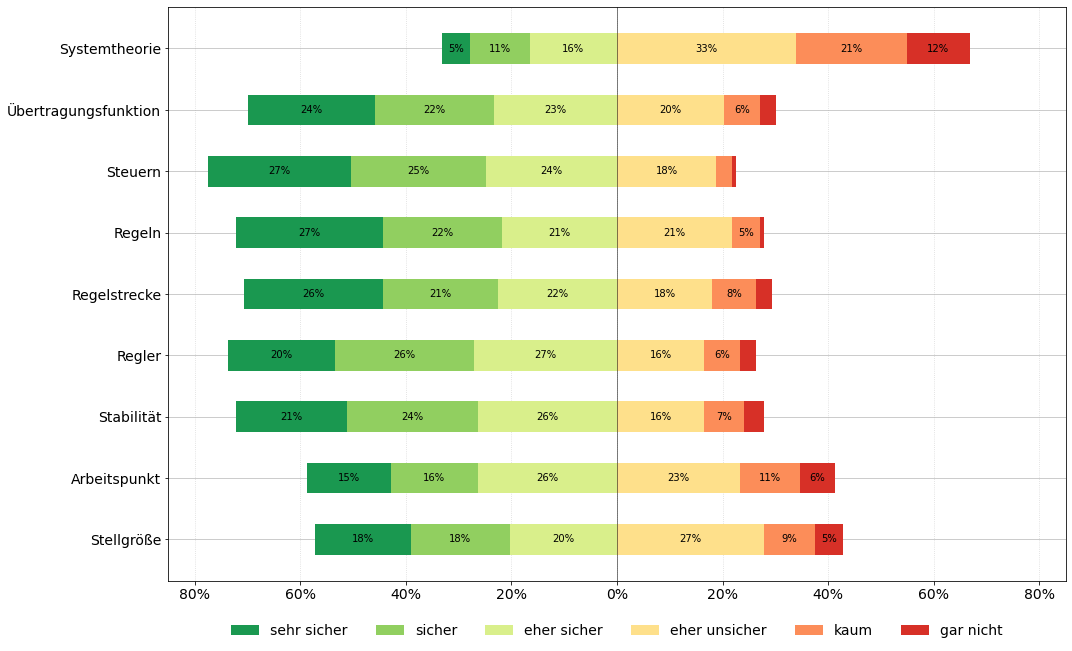

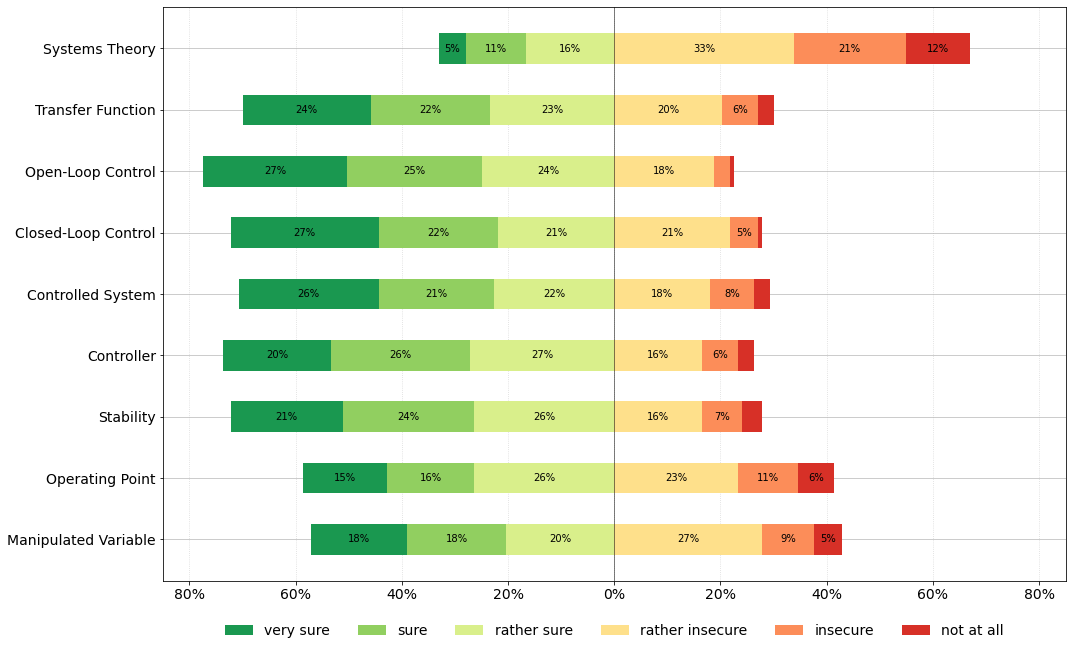

In [4]:
questions = [
    ['Systemtheorie', 'Systems Theory'], 
    ['Übertragungsfunktion', 'Transfer Function'],
    ['Steuern', 'Open-Loop Control'],
    ['Regeln', 'Closed-Loop Control'],
    ['Regelstrecke', 'Controlled System'],
    ['Regler', 'Controller'],
    ['Stabilität', 'Stability'],
    ['Arbeitspunkt', 'Operating Point'],
    ['Stellgröße', 'Manipulated Variable']
]
category_names = ['sehr sicher', 'sicher', 'eher sicher', 'eher unsicher', 'kaum', 'gar nicht']
legend_entries = ['very sure', 'sure', 'rather sure', 'rather insecure', 'insecure', 'not at all']
#title = '3. Schätze dich bitte selber ein, wie sicher du die folgenden Grundbegriffe der Regelungstechnik in eigene Worte fassen kannst.'
title = ''
fig, ax = plot_likert_scale(questions, category_names, title, legend_entries, 'de')
fig.savefig('question_3_german.pdf')
fig, ax = plot_likert_scale(questions, category_names, title, legend_entries, 'en')
# plt.show()
fig.savefig('question_3_english.pdf')
fig.savefig('question_3_english.png')

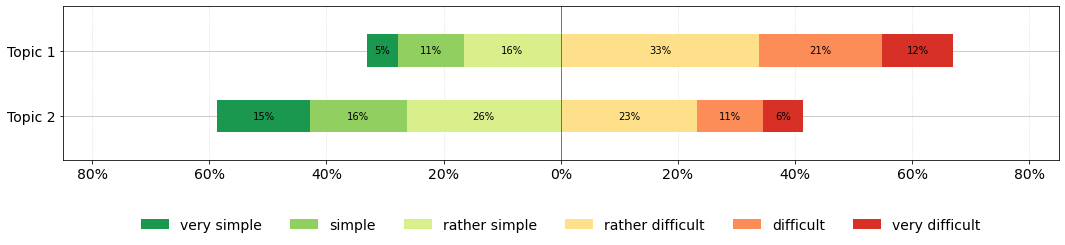

In [5]:
# Beispiel.
questions = [
    ['Systemtheorie', 'Topic 1'],
    ['Arbeitspunkt', 'Topic 2']
]
category_names = ['sehr sicher', 'sicher', 'eher sicher', 'eher unsicher', 'kaum', 'gar nicht']
legend_entries = ['very simple', 'simple', 'rather simple', 'rather difficult', 'difficult', 'very difficult']
fig, ax = plot_likert_scale(questions, category_names, title, legend_entries, 'en')
# plt.show()
fig.savefig('diverging_stacked_bar_chart.pdf')

## 4., 5. und 6.: Wie schwer fandest du die folgenden Themen zu verstehen?

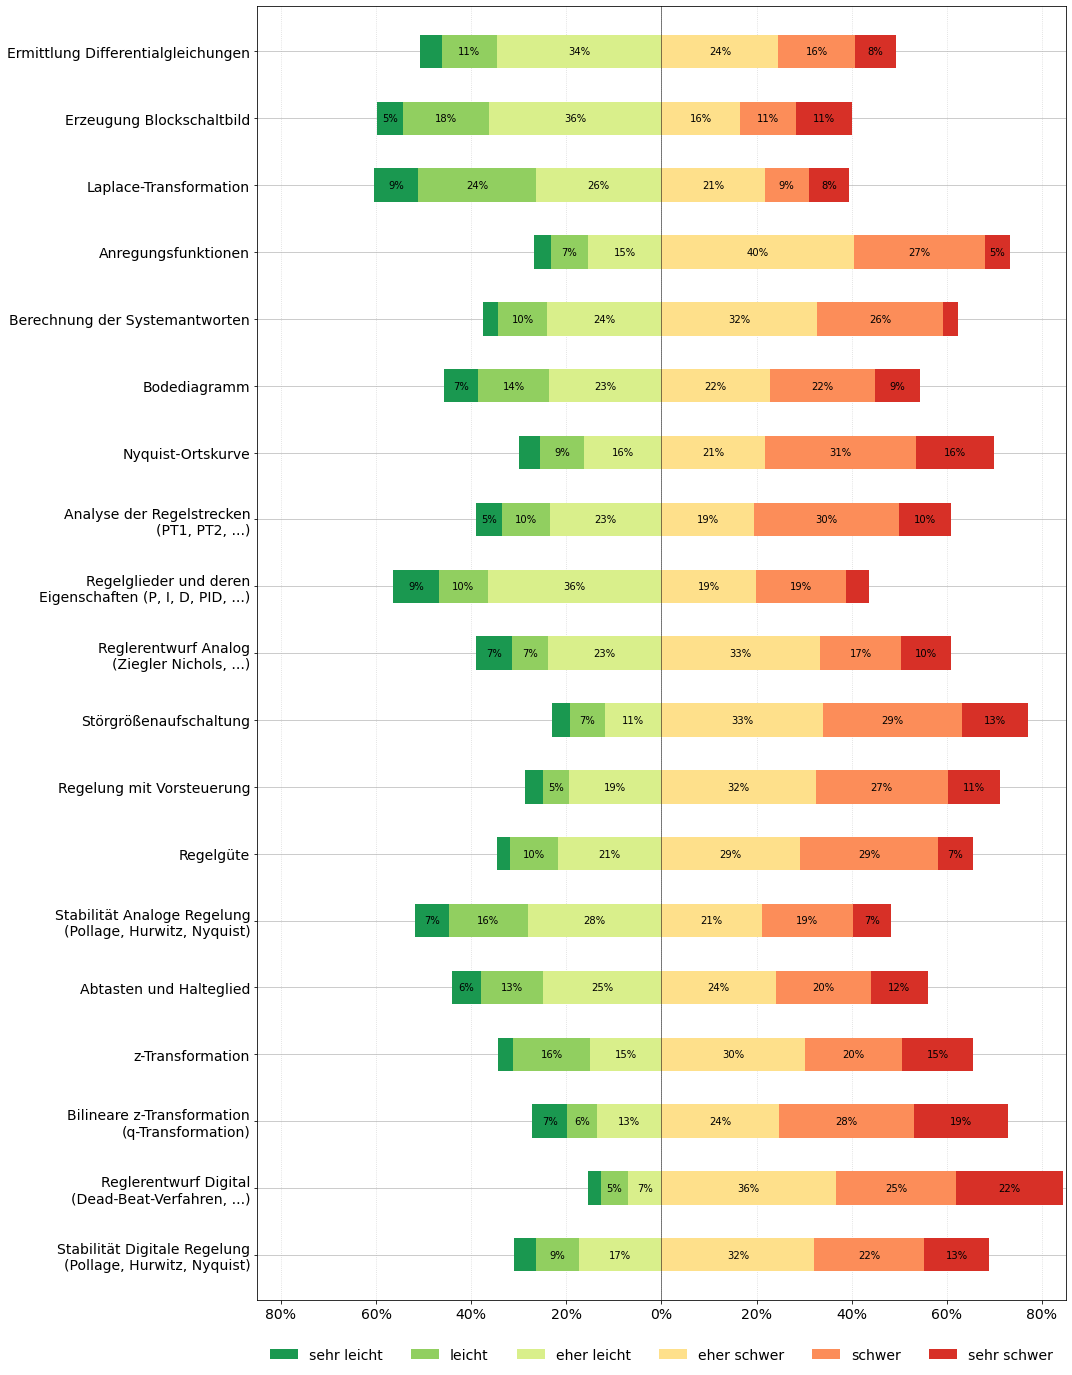

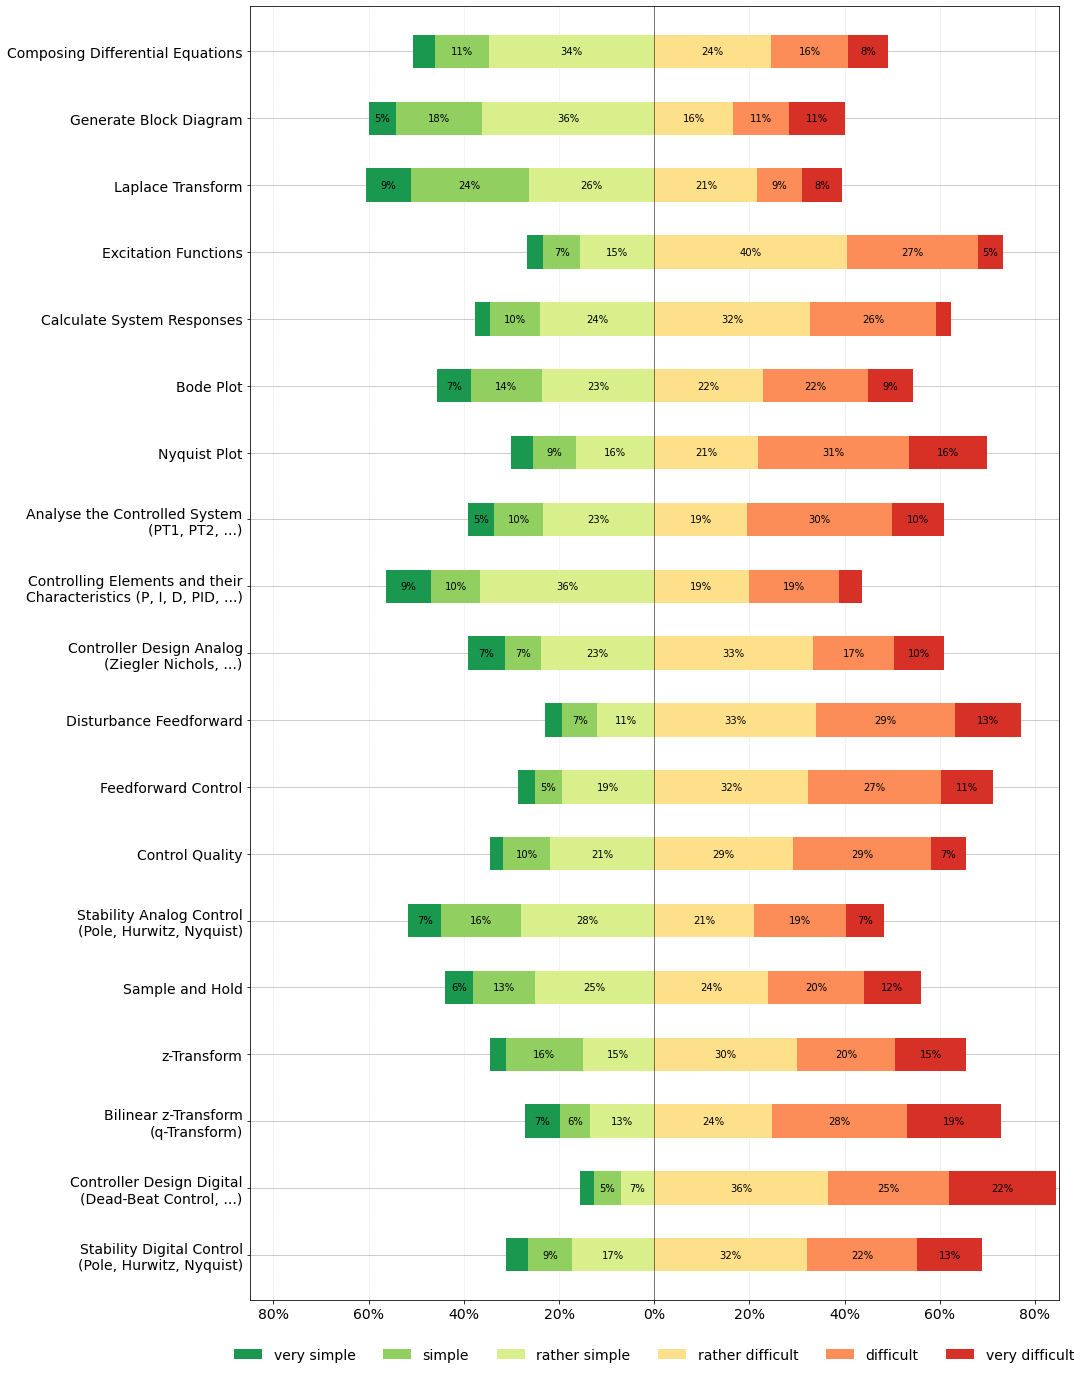

In [6]:
questions = [
    ['Ermittlung Differentialgleichungen', 'Composing Differential Equations'],
    ['Erzeugung Blockschaltbild', 'Generate Block Diagram'],
    ['Laplace-Transformation', 'Laplace Transform'],
    ['Anregungsfunktionen', 'Excitation Functions'],
    ['Berechnung der Systemantworten', 'Calculate System Responses'],
    ['Bodediagramm', 'Bode Plot'],
    ['Nyquist-Ortskurve', 'Nyquist Plot'],
    ['Analyse der Regelstrecken (PT1, PT2, ...)', 'Analyse the Controlled System\n(PT1, PT2, ...)', 'Analyse der Regelstrecken\n(PT1, PT2, ...)'],
    ['Regelglieder und deren Eigenschaften (P, I, D, PID, ...)', 'Controlling Elements and their\nCharacteristics (P, I, D, PID, ...)', 'Regelglieder und deren\nEigenschaften (P, I, D, PID, ...)'],
    ['Reglerentwurf Analog (Ziegler Nichols, ...)', 'Controller Design Analog\n(Ziegler Nichols, ...)', 'Reglerentwurf Analog\n(Ziegler Nichols, ...)'],
    ['Störgrößenaufschaltung', 'Disturbance Feedforward'],
    ['Regelung mit Vorsteuerung', 'Feedforward Control'],
    ['Regelgüte', 'Control Quality'],
    ['Stabilität Analoge Regelung (Pollage, Hurwitz, Nyquist)', 'Stability Analog Control\n(Pole, Hurwitz, Nyquist)', 'Stabilität Analoge Regelung\n(Pollage, Hurwitz, Nyquist)'],
    ['Abtasten und Halteglied', 'Sample and Hold'],
    ['z-Transformation', 'z-Transform'],
    ['Bilineare z-Transformation (q-Transformation)', 'Bilinear z-Transform\n(q-Transform)', 'Bilineare z-Transformation\n(q-Transformation)'],
    ['Reglerentwurf Digital (Dead-Beat-Verfahren, ...)', 'Controller Design Digital\n(Dead-Beat Control, ...)', 'Reglerentwurf Digital\n(Dead-Beat-Verfahren, ...)'],
    ['Stabilität Digitale Regelung\xa0(Pollage, Hurwitz, Nyquist)', 'Stability Digital Control\n(Pole, Hurwitz, Nyquist)', 'Stabilität Digitale Regelung\n(Pollage, Hurwitz, Nyquist)']
]
category_names = ['sehr leicht', 'leicht', 'eher leicht', 'eher schwer', 'schwer', 'sehr schwer']
category_min_max = ['very simple', 'very difficult']
legend_entries = ['very simple', 'simple', 'rather simple', 'rather difficult', 'difficult', 'very difficult']
#title = '4. - 6. Wie schwer fandest du die folgenden Themen der Regelungstechnik zu verstehen?'
title = ''
fig, ax = plot_likert_scale(questions, category_names, title, legend_entries, 'de')
fig.savefig('question_456_german.pdf')
fig, ax = plot_likert_scale(questions, category_names, title, legend_entries, 'en')
fig.savefig('question_456_english.pdf')
fig.savefig('question_456_english.png')

## 7.

## 8. Welche Hilfsmittel hast du neben dem Skript zum Erlernen von Regelungstechnik verwendet?

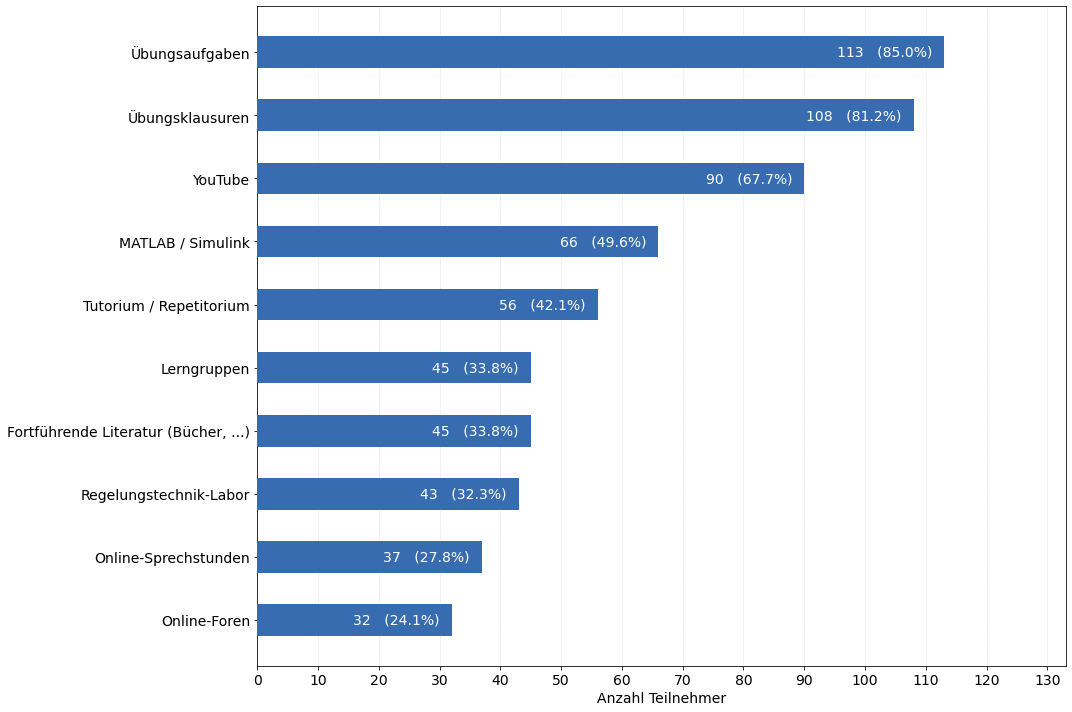

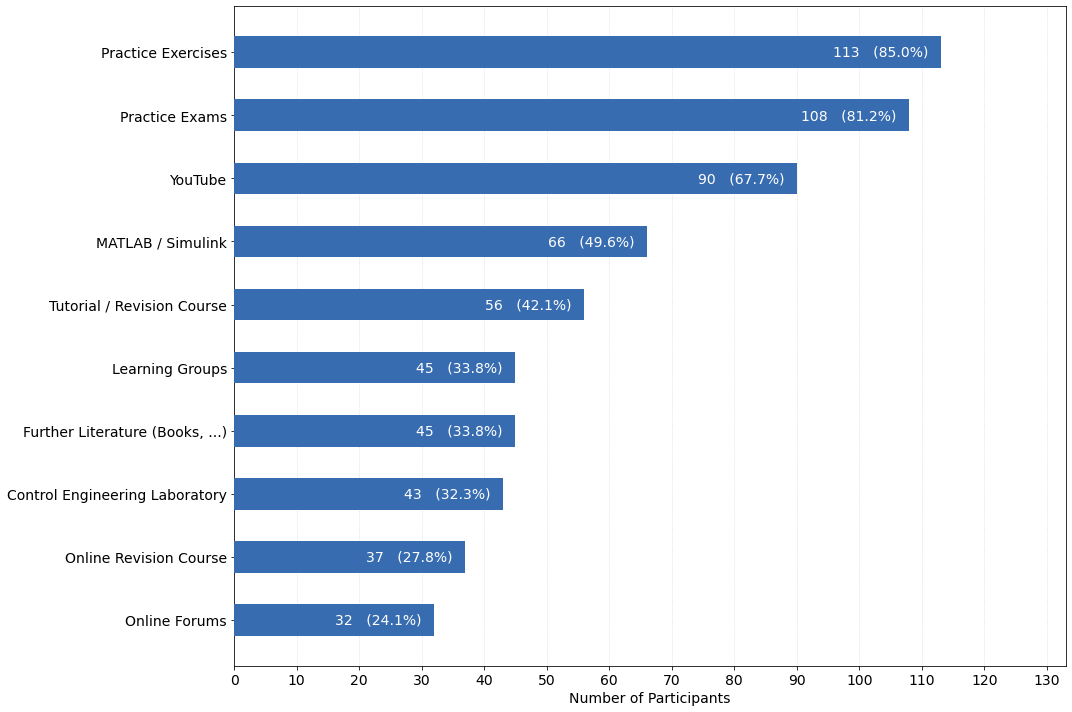

In [7]:
# Extract the data.
answers = []
for answer in df['Welche Hilfsmittel hast du neben dem Skript zum Erlernen von Regelungstechnik verwendet?']:
    if type(answer) != float:
        answers += answer.split(';')[:-1]
df_answers = pd.Series(answers)
df_answers.value_counts()
answer = []; answer_count = []
# Only show the interesting answers.
for _answer, _answer_count in df_answers.value_counts().items():
    answer.append(_answer)
    answer_count.append(_answer_count)
answer_english = [
    'Practice Exercises',
    'Practice Exams',
    'YouTube',
    'MATLAB / Simulink',
    'Tutorial / Revision Course',
    'Learning Groups', 
    'Further Literature (Books, ...)',
    'Control Engineering Laboratory',
    'Online Revision Course',
    'Online Forums'
]
# Plot the data.
for n in range(2):
    fig1, ax1 = plt.subplots(figsize=(15,10))
    if (n == 0):
        ax1.barh(answer, answer_count, color='#386cb0', height=0.5, zorder=3)
    else:
        ax1.barh(answer_english, answer_count, color='#386cb0', height=0.5, zorder=3)
    ax1.invert_yaxis()  # labels read top-to-bottom
    ax1.set_xlim(0,133)
    ax1.set_xticks(list(range(0,140,10)))
    ax1.xaxis.grid(ls=':', zorder=0, alpha=0.5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    for i, v in enumerate(answer_count):
        ax1.annotate(str(v) + '   (' + str(round(v/133*100,1)) + '%)',
                    xy=(v-2, i), annotation_clip=False,
                    horizontalalignment='right', verticalalignment='center',
                    fontsize=14, color='white')
    if (n == 0):
        plt.xlabel('Anzahl Teilnehmer', fontsize=14)
    else:
        plt.xlabel('Number of Participants', fontsize=14)
    
        
    plt.tight_layout()
    plt.show()
    if (n == 0):
        fig1.savefig('question_8_german.pdf')
    else:
        fig1.savefig('question_8_english.pdf')
        fig1.savefig('question_8_english.png')